Testing the mechanical phase shifter. 

In [5]:
import numpy as np
import pocketvna
import os
import matplotlib.pyplot as plt

## VNA

In [6]:
# Connecting the VNA
driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '', 'product': 'PocketVNA', 'vendor': 'Martin', 'read': True, 'write': True}


## Measurement folder

In [7]:
# Setting the folder where the measurement data will be stored

# Main folder
measurement_folder_name = "Measurements_9"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(measurement_folder_name):
    os.mkdir(measurement_folder_name)

## Measurement

In [10]:
#------------------------------------------Measurements--------------------------------------------

def data_saving(s21, name, i):
    file_name ="{}_0-6GHz_mech-phase-shifter_setting-{}.dat".format(name, i)
    save_name = os.path.join("Measurements_9", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

def calibrating(s21):
    # Setting the file name of the calibration open calibration data
    file_name = "cal-s21_open_4_2GHz.dat"
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_5", file_name)
    # Load the data
    cal_open = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_open = cal_open[0] + cal_open[1] * 1j
    
    # Setting the file name of the calibration open calibration data
    file_name = "cal-s21_through_4_2GHz.dat"
    # Setting the path where the file can be found
    save_name = os.path.join("Calibration_5", file_name)
    # Load the data
    cal_through = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    t_through = cal_through[0] + cal_through[1] * 1j
        
    
    return (s21 - t_open) / (t_through - t_open)

#---------------------------------------------Setup------------------------------------------------

freq = 4200000000
average = 10


#------------------------------------------Measurement--------------------------------------------

for i in range(0, 18):
    input("{}: Spin the phase shifter knob 360 degrees".format(i))
    s11, s21, s12, s22 = driver.single_scan(freq, average, pocketvna.NetworkParams.S21)

    data_saving(s21, "s21", i)
    cal = calibrating(s21)
    data_saving(cal, "s21-cal", i)

0: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-0.dat
Saved: Measurements_9\s21-cal_0-6GHz_mech-phase-shifter_setting-0.dat
1: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-1.dat
Saved: Measurements_9\s21-cal_0-6GHz_mech-phase-shifter_setting-1.dat
2: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-2.dat
Saved: Measurements_9\s21-cal_0-6GHz_mech-phase-shifter_setting-2.dat
3: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-3.dat
Saved: Measurements_9\s21-cal_0-6GHz_mech-phase-shifter_setting-3.dat
4: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-4.dat
Saved: Measurements_9\s21-cal_0-6GHz_mech-phase-shifter_setting-4.dat
5: Spin the phase shifter knob 360 degrees
Saved: Measurements_9\s21_0-6GHz_mech-phase-shifter_setting-5.

## Plotting

Text(0.5, 1.0, '4.2GHz mechanical phase shifter phase')

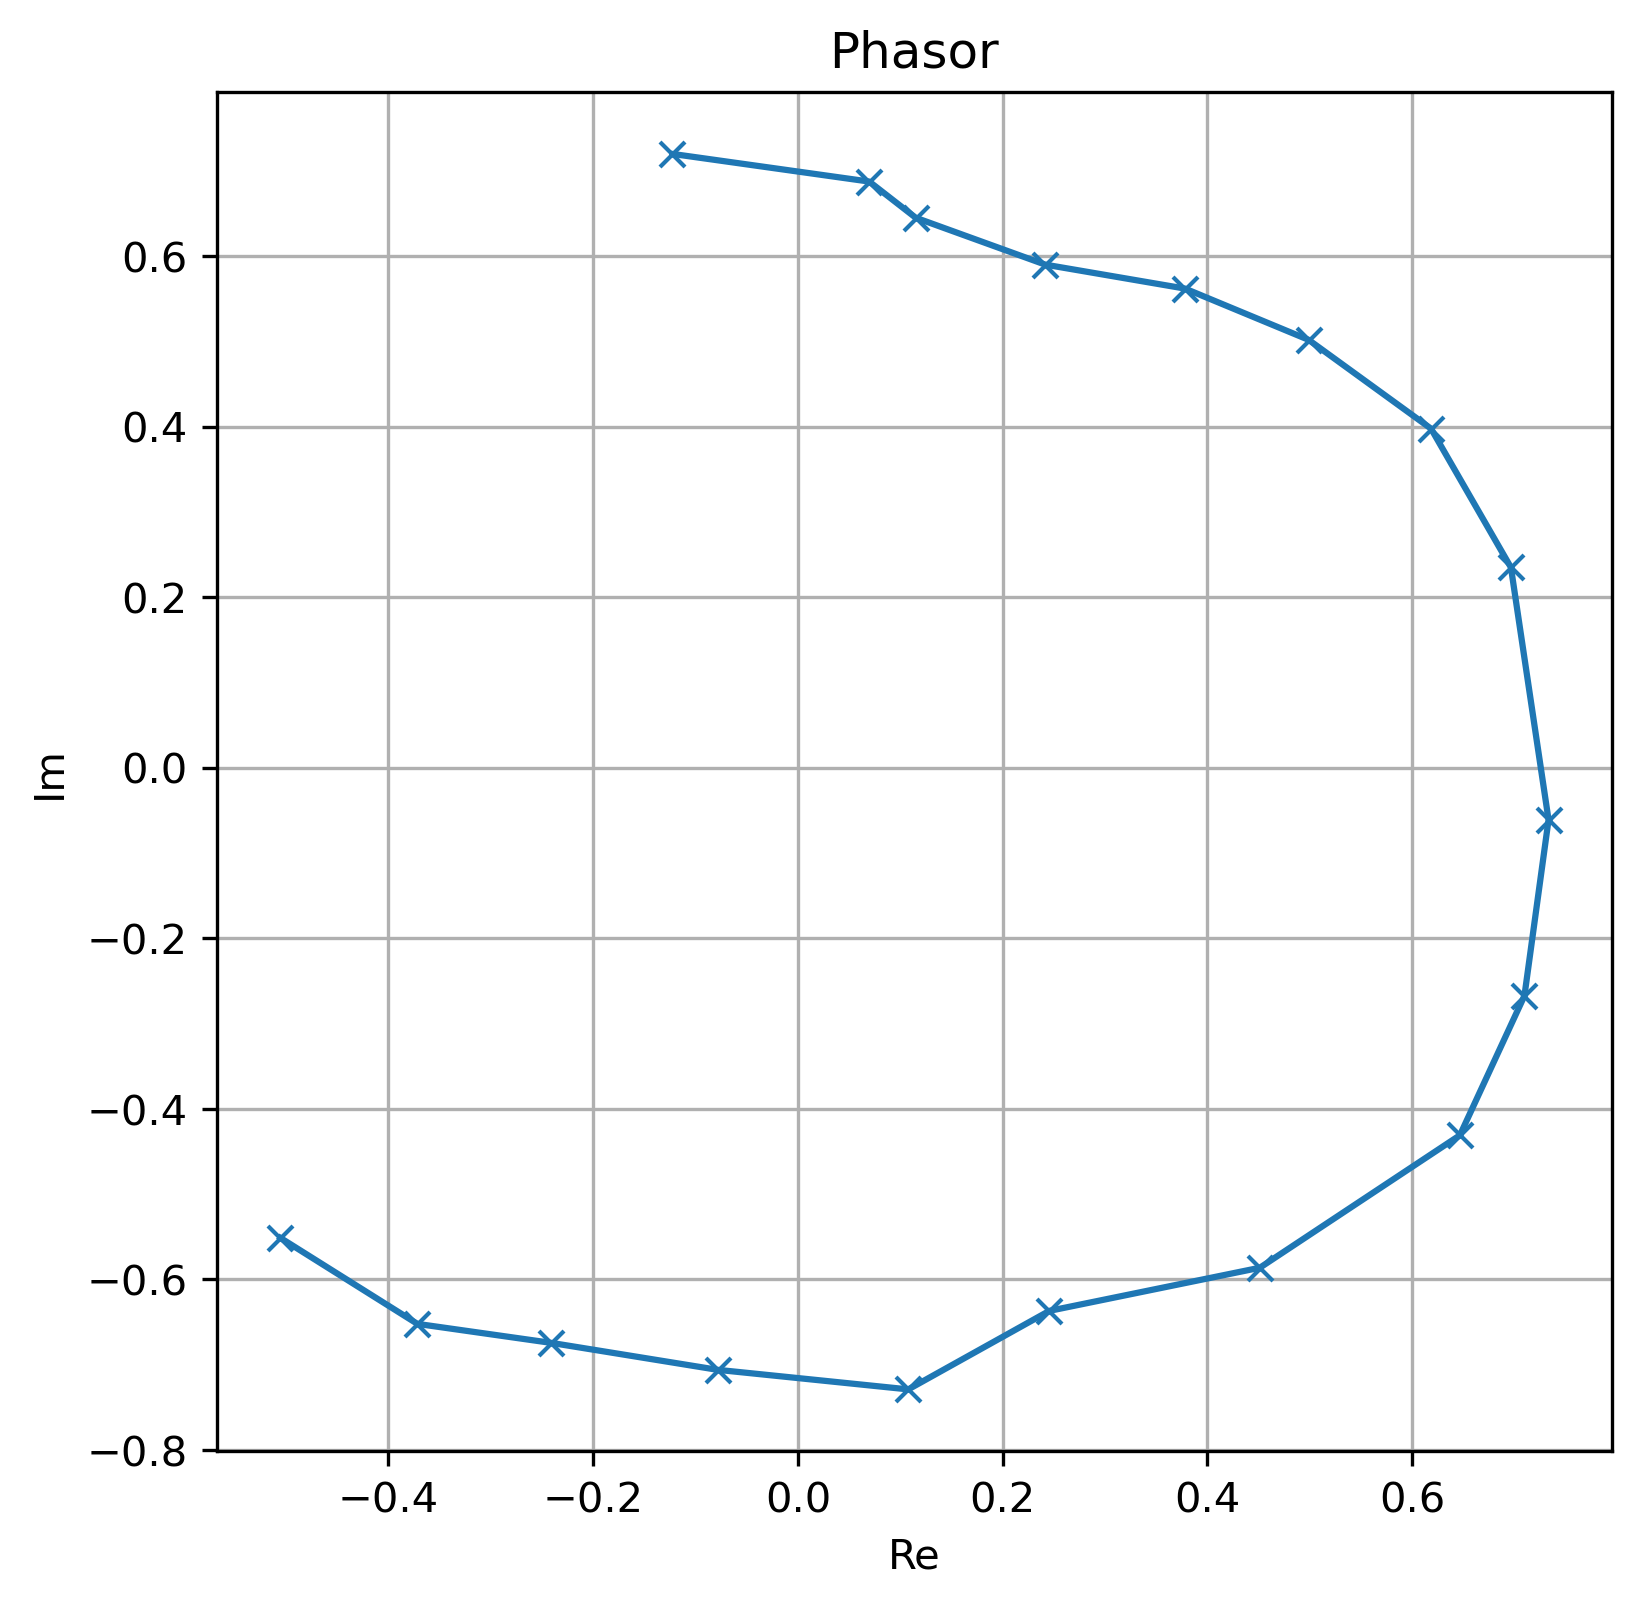

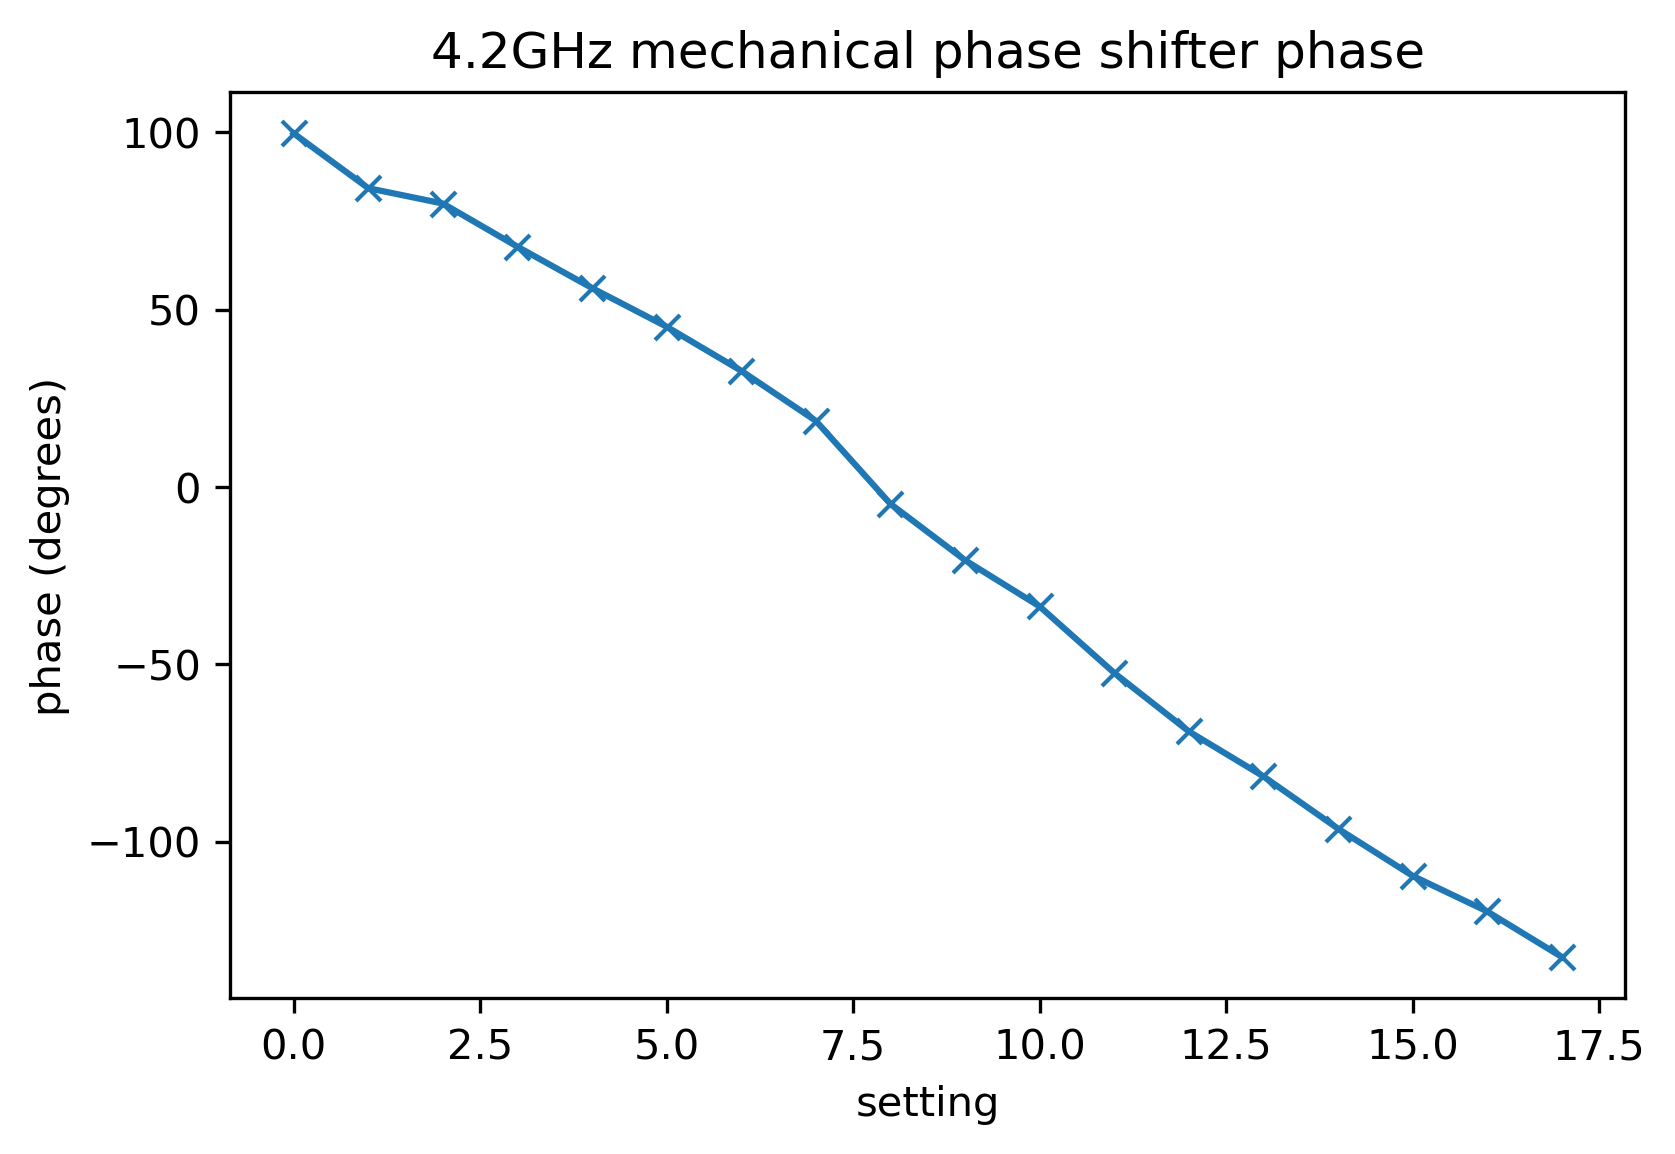

In [28]:
def opening_data(name, i):
    # Setting the file name of the calibration open calibration data
    file_name = "{}_0-6GHz_mech-phase-shifter_setting-{}.dat".format(name, i)
    # Setting the path where the file can be found
    save_name = os.path.join("Measurements_9", file_name)
    # Load the data
    temp = np.loadtxt(save_name)
    # Get the data and put the real and imaginary part together again
    return temp[0] + temp[1] * 1j
    
    
def make_labels(phase_dif):
    temp = []
    for dif in phase_dif:
        temp.append("$\phi_1 - \phi_2 = ${} degrees".format(dif))
    return temp
    
def plot_phasor(s21):
    plt.rcParams['figure.figsize'] = (6,6)
    plt.rcParams['figure.dpi'] = 300
    fig = plt.figure(1)
    plt.plot(s21.real, s21.imag, '-x')
    plt.grid()
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.title("Phasor")
    
def plot_amplitude(s21, freq, leg):
    
    amp = np.sqrt(s21.real**2 + s21.imag**2)
    amp = 20*np.log10(amp)
    
    plt.figure(2)
    plt.plot(freq, amp, '-')
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.title("Attenuator")
    plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left')
    
def plot_phase(s21, phase, phase_dif):
    arg = 180 * np.arctan2(s21.imag, s21.real)/np.pi
    
    plt.figure(3)
    plt.plot(phase, arg, 'x')
    plt.xlabel("phase (degrees)")
    plt.ylabel("Amplitude")
    plt.title("Attenuator")
    plt.legend(phase_dif)
    
steps = 600    
freq = np.linspace(10000000, 6000000000, 600, dtype=np.uint64)



leg = []
s21_cal = np.zeros(18, dtype=np.complex)

for i in range(0, 18, 1):
    leg.append("att setting {}".format(i))
    s21_cal[i] = opening_data("s21-cal", i)    

plot_phasor(s21_cal)
arg = np.arctan2(s21_cal.imag, s21_cal.real)
arg = 180*arg/np.pi

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 300

plt.figure(4)
plt.plot(np.arange(0, 18, 1), arg, '-x')
plt.xlabel("setting")
plt.ylabel("phase (degrees)")
plt.title("4.2GHz mechanical phase shifter phase")